In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import box
import rasterio
from rasterio.warp import transform_geom, calculate_default_transform
from shapely.geometry import Point, Polygon
from ShallowLearn import LoadData
from ShallowLearn.Training import reshape_data
import matplotlib.pyplot as plt
from  ShallowLearn import Transform
from ShallowLearn import ImageHelper
from ShallowLearn.Widgets import BandPlotter
from ShallowLearn.Indices import ci, ndci, wqi, oci, wbei, bgr
from ShallowLearn.band_mapping import band_mapping
import os
import glob

In [2]:
%matplotlib inline

In [3]:
# specify the directory path
dir_path = '/media/ziad/Expansion/Cleaned_Data_Directory'

# search for all .tiff files in the directory
file_list = glob.glob(dir_path + '/*6880*.tiff')

# get the full directory paths for each file
dir_list = [os.path.join(dir_path, f) for f in file_list]

file_dict = {}
for file in dir_list:
    s = file.split('/')[-1].split('.')[0]
    date = s[12:20]
    img = ImageHelper.load_img(file)
    file_dict[date] = img

In [4]:
hsi_dict = {}
for dates, arrs in file_dict.items():
    #print(dates, arrs.shape)
    hsi_dict[dates] = Transform.rgb_to_hsi(file_dict[dates])


/home/ziad/Documents/Github/ShallowLearn/ShallowLearn/Transform.py:127: RuntimeWarning: invalid value encountered in sqrt
  S = np.sqrt(num / den)


In [5]:
hsi_dict.keys()

dict_keys(['20160711', '20160721', '20160820', '20160909', '20170308', '20170507', '20170706', '20170716', '20180502', '20180731', '20180919', '20190507', '20190716', '20190825', '20190904', '20190914', '20200211', '20200610', '20200620', '20210506', '20210516', '20210615', '20210804', '20210814', '20210903', '20220401', '20220501', '20220710', '20170820', '20170909', '20180328', '20180626', '20180706', '20180815', '20180825', '20180924', '20190211', '20190221', '20190313', '20190711', '20190810', '20190820', '20190830', '20190929', '20200216', '20200705', '20200804', '20200814', '20210501', '20210720', '20210730', '20220307', '20220406', '20220526'])

In [6]:
(hsi_dict["20160909"]).shape

(725, 534, 3)

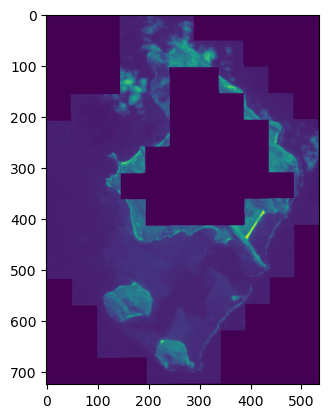

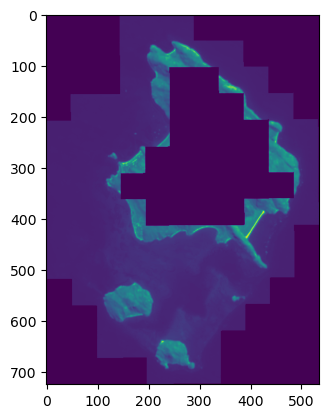

In [7]:
counter = 0
for dates, arrs in hsi_dict.items():
    if counter < 2:
        plt.imshow(arrs[:,:,2])
        plt.show()
    #arrs[:,:,2] = Transform.linear_contrast_enhancement(arrs[:,:,2]) 
    counter += 1

In [8]:
hsi_dict[dates].shTramsfpr,ape

(725, 534, 3)

In [9]:
%matplotlib widget

In [10]:
from ShallowLearn.Widgets import BandPlotter
hsi_img = Transform.LCE_multi(hsi_dict[dates])
BandPlotter(hsi_img)

ValueError: zero-size array to reduction operation minimum which has no identity

In [17]:
file_dict[dates].shape

(725, 534, 13)

In [24]:
lab = ImageHelper.plot_lab(file_dict[dates])

In [26]:
lab[:,:,0] = hsi_img[:,:,2]

In [25]:
lab

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

IntSlider(value=0, description='Band', max=2)

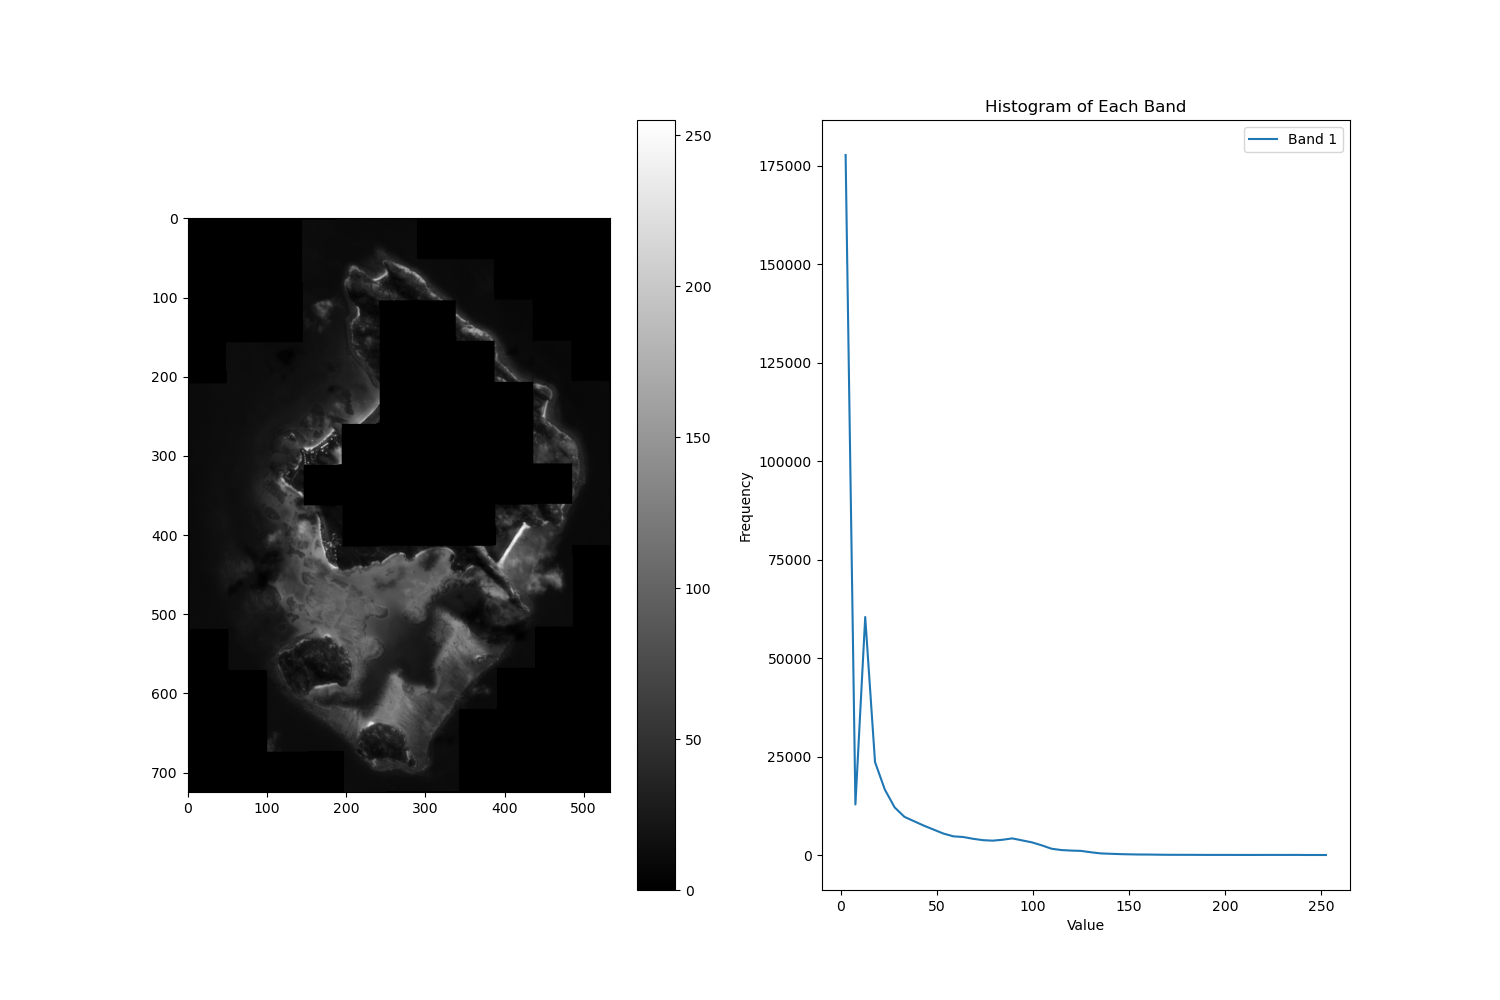

In [27]:
BandPlotter(lab)

In [28]:
ImageHelper.plot_rgb(lab)

IndexError: index 3 is out of bounds for axis 2 with size 3

In [29]:
from skimage import color

In [30]:
plt.imshow(color.lab2rgb(lab))